<h1>CNN - Processing</h1>

<h5>Importing Packages</h5>

In [ ]:
try:
    from google.colab import drive
    drive.mount('/drive', force_remount=False)
    %run "/drive/My Drive/Colab Notebooks/Notebooks/Deep Learning - Processing.ipynb"
except:
    %run "/Google Drive/Colab Notebooks/Notebooks/Deep Learning - Processing.ipynb"

<h5>Models</h5>

In [ ]:
def model(name):

    def modelBuilder(n_convolutional, n_features, n_outputs):
        model = Sequential()
        model.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(n_convolutional, n_features)))
        model.add(BatchNormalization())
        model.add(SpatialDropout1D(0.15))

        model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
        model.add(BatchNormalization())
        model.add(SpatialDropout1D(0.15))
        
        model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
        model.add(GlobalAvgPool1D())
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(n_outputs, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
        return model, name

    return modelBuilder

In [ ]:
def parameters(input_shape, output_shape):

    return {
        "n_convolutional": input_shape[1], 
        "n_features": input_shape[2], 
        "n_outputs": output_shape[1]
    }

<h5>Parameters</h5>

In [ ]:
datasets = getDataSets()

In [ ]:
sides = ['left', 'right']
mode_label = True
moving_window = False
compositeAccFeatures = False
frequencyDomain=False

if compositeAccFeatures:
    input_features = 11
else:
    input_features = 7

if frequencyDomain:
    frequencies = int((fft_window / 2) + 1)
    input_features = frequencies * input_features

In [ ]:
# (batches, window size, features)
input_shapes = [
    ((None, 100, input_features), 100), 
    ((None, 200, input_features), 200), 
    ((None, 300, input_features), 300)
]

output_shape = (None, 3)

<h5>Training</h5>

In [ ]:
getLoadBar()

In [ ]:
run(
    model("CNN " + ("Frequency" if frequencyDomain else "Time") + " Domain " + str(input_features) + " Features"), 
    addCompositeAccFeatures=compositeAccFeatures,
    frequencyDomain=frequencyDomain
)

<h5>Confusion Matrix - Best Model</h5>

In [ ]:
files = [
    'experiment-1-window-300-scaler-min-max-scaler-(-1, 1)-train-acc-0.94669-val-acc-0.94776.hdf5',
    'experiment-2-window-300-scaler-min-max-scaler-(-1, 1)-train-acc-0.94398-val-acc-0.92171.hdf5',
    'experiment-3-window-300-scaler-min-max-scaler-(-1, 1)-train-acc-0.97008-val-acc-0.92170.hdf5'
]

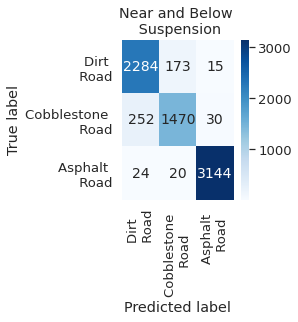

In [ ]:
confusionMatrix(files, "Near and Below \n Suspension", model("CNN Time Domain 7 Features"), (None, 300, 7), (None, 3), experiment_by_fields[0])

In [ ]:
showClassificationReport(files, model("CNN Time Domain 7 Features"), (None, 300, 7), (None, 3), experiment_by_fields[0])

{'accuracy': 0.9306529951430114,
 'asphalt_road': {'f1-score': 0.986043594166536,
  'precision': 0.9858889934148636,
  'recall': 0.986198243412798,
  'support': 3188},
 'cobblestone_road': {'f1-score': 0.8609077598828697,
  'precision': 0.8839446782922429,
  'recall': 0.839041095890411,
  'support': 1752},
 'dirt_road': {'f1-score': 0.9077901430842608,
  'precision': 0.8921875,
  'recall': 0.9239482200647249,
  'support': 2472},
 'macro avg': {'f1-score': 0.9182471657112221,
  'precision': 0.9206737239023687,
  'recall': 0.9163958531226447,
  'support': 7412},
 'weighted avg': {'f1-score': 0.9303662449031297,
  'precision': 0.9305413771417425,
  'recall': 0.9306529951430114,
  'support': 7412}}

In [ ]:
files = [
    'experiment-1-window-300-scaler-min-max-scaler-(-1, 1)-train-acc-0.88457-val-acc-0.94108.hdf5',
    'experiment-2-window-300-scaler-min-max-scaler-(-1, 1)-train-acc-0.92893-val-acc-0.90141.hdf5',
    'experiment-3-window-300-scaler-min-max-scaler-(-1, 1)-train-acc-0.95449-val-acc-0.91803.hdf5'
]

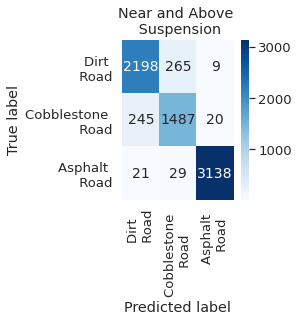

In [ ]:
confusionMatrix(files, "Near and Above \n Suspension", model("CNN Time Domain 7 Features"), (None, 300, 7), (None, 3), experiment_by_fields[1])

In [ ]:
showClassificationReport(files, model("CNN Time Domain 7 Features"), (None, 300, 7), (None, 3), experiment_by_fields[1])

{'accuracy': 0.920534268753373,
 'asphalt_road': {'f1-score': 0.9875688434303699,
  'precision': 0.9908430691506157,
  'recall': 0.9843161856963614,
  'support': 3188},
 'cobblestone_road': {'f1-score': 0.8417775261817153,
  'precision': 0.8349241998877035,
  'recall': 0.848744292237443,
  'support': 1752},
 'dirt_road': {'f1-score': 0.8905996758508914,
  'precision': 0.8920454545454546,
  'recall': 0.88915857605178,
  'support': 2472},
 'macro avg': {'f1-score': 0.9066486818209922,
  'precision': 0.9059375745279246,
  'recall': 0.907406351328528,
  'support': 7412},
 'weighted avg': {'f1-score': 0.920767147521558,
  'precision': 0.9210376775892853,
  'recall': 0.920534268753373,
  'support': 7412}}

In [ ]:
files = [
    'experiment-1-window-300-scaler-min-max-scaler-(-1, 1)-train-acc-0.93164-val-acc-0.95247.hdf5',
    'experiment-2-window-300-scaler-min-max-scaler-(-1, 1)-train-acc-0.94837-val-acc-0.89934.hdf5',
    'experiment-3-window-300-scaler-min-max-scaler-(-1, 1)-train-acc-0.97493-val-acc-0.93964.hdf5'
]

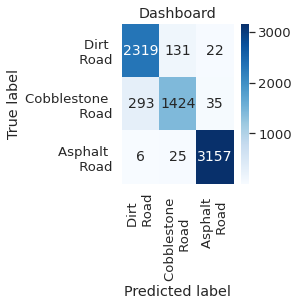

In [ ]:
confusionMatrix(files, "Dashboard", model("CNN Time Domain 7 Features"), (None, 300, 7), (None, 3), experiment_by_fields[2])

In [ ]:
showClassificationReport(files, model("CNN Time Domain 7 Features"), (None, 300, 7), (None, 3), experiment_by_fields[2])

{'accuracy': 0.9309228278467351,
 'asphalt_road': {'f1-score': 0.986254295532646,
  'precision': 0.9822650902302427,
  'recall': 0.990276035131744,
  'support': 3188},
 'cobblestone_road': {'f1-score': 0.8547418967587035,
  'precision': 0.9012658227848102,
  'recall': 0.8127853881278538,
  'support': 1752},
 'dirt_road': {'f1-score': 0.9111984282907662,
  'precision': 0.8857906799083269,
  'recall': 0.9381067961165048,
  'support': 2472},
 'macro avg': {'f1-score': 0.9173982068607053,
  'precision': 0.9231071976411266,
  'recall': 0.9137227397920342,
  'support': 7412},
 'weighted avg': {'f1-score': 0.9301361322199267,
  'precision': 0.9309435226533169,
  'recall': 0.9309228278467351,
  'support': 7412}}